# Data Cleaning

In this notebook, I will merge my train dataset with my weather data, as well as collapse the rows in my train data set by summing the number of mosquitoes found in one trap (if 50 mosquitoes were found then the count overflowed to the next row).

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in my clean weather data and my train data

In [135]:
#df = pd.read_csv('../data/dataframe.csv',index_col=0, parse_dates=['Date'])
weather = pd.read_csv('../data/clean_weather.csv', index_col=0)
train = pd.read_csv('../data/train_clean.csv',  index_col=0)

Merging the two dataframes

In [136]:
df = pd.merge(train, weather, on = 'Date')

Creating a new data column that will survive through all the merges

In [137]:
df['Date2'] = df['Date']

In [138]:
df.set_index('Date',inplace=True)

Checking to make sure I have the all the columns that I want

In [139]:
df.columns

Index(['Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax', 'Tmin', 'Tavg',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Heat', 'DewPoint', 'WetBulb',
       'Cool', 'PrecipTotal', 'StnPressure', 'Sunset', 'Sunrise', 'Depart',
       'CodeSum', 'Date2'],
      dtype='object')

Grouping my data by trap, species, and date, and summing up the number of mosquitoes and if west nile virus was present or not

In [140]:
grouped_traps = df.groupby(['Date','Trap','Species'])[['NumMosquitos', 'WnvPresent']].sum()

resetting the index as the date and renaming this dataframe to flat_groups

In [141]:
flat_groups = grouped_traps.reset_index().set_index('Date')

Looking at the value_counts for number of mosquitoes, it ranges from  $0$ to  $2500$

In [142]:
flat_groups['WnvPresent'] = flat_groups['WnvPresent'].map(lambda x: int(x > 0))

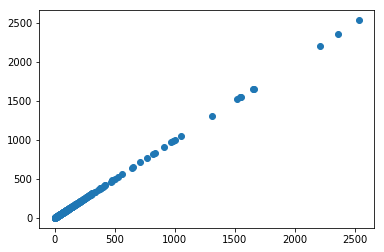

In [143]:
plt.scatter(flat_groups.NumMosquitos.value_counts().index, flat_groups.NumMosquitos.value_counts().index)

Looking at the distribution for number of mosquitoes with west nile, we can see that its heavily rigt skewed with a  center that is a little higher than zero. This is because most of the samples had observations with very low numbers of mosquitos.

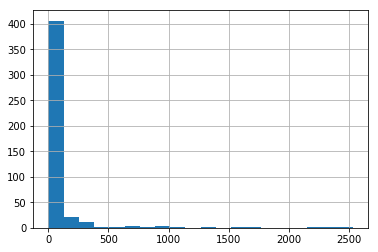

In [144]:
flat_groups[flat_groups['WnvPresent']==1].NumMosquitos.hist(bins=20)

Looking at the distribution for number of mosquitoes without west nile. Like the graph above, it is also heavily right skewed.

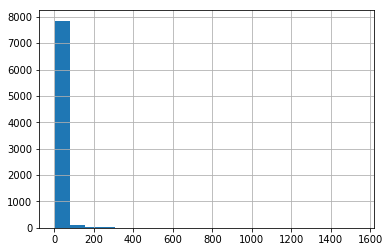

In [145]:
flat_groups[flat_groups['WnvPresent']==0].NumMosquitos.hist(bins=20)

## Merging my flat dataframe with my train + weather dataframe

In [146]:
df2 = pd.merge(flat_groups, df[['Day_length','Tmax','Tmin', 'Tavg',
       'ResultSpeed','ResultDir', 'AvgSpeed','Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'Date2']].drop_duplicates(), how='left', left_index=True, right_index=True)

Setting the index for df2 for future merging

In [147]:
df2.index = df2['Date2']

Merging the dataframe I just made, df2 and my original dataframe's columns: Latitude, Longitude, and Trap.

In [148]:
df3 = pd.merge(df2, df[['Latitude', 'Longitude', 'Trap']].drop_duplicates(), how='left', on='Trap')

In [149]:
df3.head()

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,...,Depart,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Date2,Latitude,Longitude
0,T002,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
1,T002,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
2,T007,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.994991,-87.769279
3,T015,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812
4,T015,CULEX RESTUANS,4,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812


Creating a new variable Month to track only the months. Also dropping my Date2 variable. 

In [150]:
df3.Date2 = pd.to_datetime(df3.Date2)

In [151]:
df3['Month'] = df3.Date2.map(lambda x: x.month)

In [152]:
df3.set_index('Date2',inplace=True)

In [153]:
df3.sort_values('Date2',axis=0,ascending=True)

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,...,Depart,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Latitude,Longitude,Month
Date2,,,,,,,,,,,,,,,,,,,,,
2007-05-29,T002,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.954690,-87.800991,5
2007-05-29,T159,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.732984,-87.649642,5
2007-05-29,T153,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.907645,-87.760886,5
2007-05-29,T148,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,42.017430,-87.687769,5
2007-05-29,T143,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.999129,-87.795585,5
2007-05-29,T129,CULEX RESTUANS,2,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.891126,-87.611560,5
2007-05-29,T096,CULEX RESTUANS,5,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.731922,-87.677512,5
2007-05-29,T096,CULEX PIPIENS,1,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.731922,-87.677512,5
2007-05-29,T094,CULEX RESTUANS,3,0,53760,88.0,62.5,75.5,5.80,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.720848,-87.666014,5


In [154]:
df3.reset_index(inplace=True)

In [155]:
df3

,Date2,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,...,Depart,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Latitude,Longitude,Month
0,2007-05-29,T002,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.954690,-87.800991,5
1,2007-05-29,T002,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.954690,-87.800991,5
2,2007-05-29,T007,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.994991,-87.769279,5
3,2007-05-29,T015,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.974089,-87.824812,5
4,2007-05-29,T015,CULEX RESTUANS,4,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.974089,-87.824812,5
5,2007-05-29,T045,CULEX RESTUANS,2,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.921600,-87.666455,5
6,2007-05-29,T046,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.891118,-87.654491,5
7,2007-05-29,T048,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.867108,-87.654224,5
8,2007-05-29,T048,CULEX RESTUANS,2,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.867108,-87.654224,5
9,2007-05-29,T049,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.80,...,10,53.45788,65.5,10.5,BR HZ,0.000,29.415,41.896282,-87.655232,5


In [156]:
df3.drop('Date2', axis=1, inplace=True)

KeyError: "labels ['Date2'] not contained in axis"

Saving my results

In [ ]:
df3.to_csv('../data/final_dataframe.csv')